In [1]:
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch
import numpy as np
from matplotlib import pyplot as plt
from model import Voice2Vec
from data import VoicesData, VoiceDataset
%matplotlib inline

In [2]:
PATH = 'data/users.dl'
users = VoicesData(path=PATH)

sound_shape = (100, 20)
data = users.get_train(sound_shape)

### Train-test split

In [3]:
np.random.seed(100)
indices = np.random.permutation(np.arange(len(data)))
train_size = int(0.8 * len(data))
train_idx, test_idx = indices[:train_size], indices[train_size:]

In [4]:
def loss_func(pred_x, alpha=1e-2):
    """
    Args:
        pred_x : torch.Variable, shape (batch_size, 3, dim)
    Return:
        loss : torch.Variable
    """
    def distance_sq(x1, x2):
        return torch.sum((x1 - x2) ** 2, dim=-1)
    d1 = distance_sq(pred_x[:, 0, :], pred_x[:, 1, :])
    d2 = distance_sq(pred_x[:, 0, :], pred_x[:, 2, :])
    return torch.mean(torch.clamp(d1 - d2 + alpha, 0))

In [5]:
epochs = 100
batch_size = 100
dim = 150
lr = 1e-4
v2v_model = Voice2Vec(sound_shape, dim)
optimizer = torch.optim.Adam(v2v_model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(
            optimizer, 10 * len(data) // batch_size, gamma=0.8
            )

In [6]:
data_train = np.array(data)[train_idx, ...]
data_test = np.array(data)[test_idx, ...]
train_loader = DataLoader(VoiceDataset(data_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(VoiceDataset(data_test), batch_size=batch_size, shuffle=True)

In [7]:
train_losses = []
test_losses = []
for epoch in tqdm(range(epochs)):
    train_loss = 0.
    for i, batch in enumerate(train_loader):
        scheduler.step()
        optimizer.zero_grad()
        output = v2v_model(Variable(torch.transpose(batch, 2, 3).contiguous()))
        loss = loss_func(output)
        loss.backward()
        optimizer.step()
        train_loss += loss.data.numpy()[0]
    v2v_model.eval()
    test_loss = 0.
    for i, batch in enumerate(test_loader):
        output = v2v_model(Variable(torch.transpose(batch, 2, 3).contiguous()))
        test_loss += loss_func(output).data.numpy()[0]
        
    print("epoch:\t", epoch, "\ttrain loss:\t", train_loss / len(train_loader), 
          "\ttest loss:\t", test_loss / len(test_loader))
    train_losses.append(train_loss / len(train_loader))
    test_losses.append(test_loss / len(test_loader))

  1%|          | 1/100 [00:04<07:00,  4.24s/it]

epoch:	 0 	train loss:	 0.0129146866301 	test loss:	 0.0104445280241


  2%|▏         | 2/100 [00:08<06:47,  4.16s/it]

epoch:	 1 	train loss:	 0.0101534119541 	test loss:	 0.0101436021339


  3%|▎         | 3/100 [00:12<06:56,  4.30s/it]

epoch:	 2 	train loss:	 0.00990861980245 	test loss:	 0.0100644151015


  4%|▍         | 4/100 [00:17<06:49,  4.27s/it]

epoch:	 3 	train loss:	 0.0097173169987 	test loss:	 0.00999685030963


  5%|▌         | 5/100 [00:21<06:51,  4.33s/it]

epoch:	 4 	train loss:	 0.00947094229715 	test loss:	 0.00992808251509


  6%|▌         | 6/100 [00:26<06:50,  4.37s/it]

epoch:	 5 	train loss:	 0.0090846445611 	test loss:	 0.00974745649312


  7%|▋         | 7/100 [00:30<06:48,  4.39s/it]

epoch:	 6 	train loss:	 0.00857163982333 	test loss:	 0.00971354703818


  8%|▊         | 8/100 [00:35<06:48,  4.44s/it]

epoch:	 7 	train loss:	 0.00791731784453 	test loss:	 0.00968396064958


  9%|▉         | 9/100 [00:39<06:43,  4.43s/it]

epoch:	 8 	train loss:	 0.00717734084797 	test loss:	 0.00959189794958


 10%|█         | 10/100 [00:44<06:41,  4.46s/it]

epoch:	 9 	train loss:	 0.00629596817972 	test loss:	 0.00951886350023


 11%|█         | 11/100 [00:49<06:37,  4.47s/it]

epoch:	 10 	train loss:	 0.00536249714371 	test loss:	 0.00974644148456


 12%|█▏        | 12/100 [00:53<06:32,  4.46s/it]

epoch:	 11 	train loss:	 0.0045090923751 	test loss:	 0.00935289636254


 13%|█▎        | 13/100 [00:57<06:25,  4.43s/it]

epoch:	 12 	train loss:	 0.00368511183686 	test loss:	 0.00940399271037


 14%|█▍        | 14/100 [01:02<06:22,  4.44s/it]

epoch:	 13 	train loss:	 0.00312612867648 	test loss:	 0.00940964091569


 15%|█▌        | 15/100 [01:07<06:21,  4.48s/it]

epoch:	 14 	train loss:	 0.00271211372871 	test loss:	 0.00979768298566


 16%|█▌        | 16/100 [01:11<06:15,  4.47s/it]

epoch:	 15 	train loss:	 0.00228693748275 	test loss:	 0.00936591678432


 17%|█▋        | 17/100 [01:16<06:12,  4.48s/it]

epoch:	 16 	train loss:	 0.00196136195362 	test loss:	 0.00952633729737


 18%|█▊        | 18/100 [01:20<06:08,  4.49s/it]

epoch:	 17 	train loss:	 0.00173520708839 	test loss:	 0.00945683648544


 19%|█▉        | 19/100 [01:25<06:04,  4.49s/it]

epoch:	 18 	train loss:	 0.00154261274604 	test loss:	 0.00954106223903


 20%|██        | 20/100 [01:30<06:00,  4.50s/it]

epoch:	 19 	train loss:	 0.00143254995263 	test loss:	 0.00959558505565


 21%|██        | 21/100 [01:34<05:56,  4.52s/it]

epoch:	 20 	train loss:	 0.00130258633206 	test loss:	 0.00945600707616


 22%|██▏       | 22/100 [01:39<05:52,  4.52s/it]

epoch:	 21 	train loss:	 0.00117602058474 	test loss:	 0.00954073813877


 23%|██▎       | 23/100 [01:44<05:48,  4.52s/it]

epoch:	 22 	train loss:	 0.00111806584703 	test loss:	 0.00949878345377


 24%|██▍       | 24/100 [01:48<05:45,  4.54s/it]

epoch:	 23 	train loss:	 0.00106510593053 	test loss:	 0.00953521100538


 25%|██▌       | 25/100 [01:53<05:40,  4.54s/it]

epoch:	 24 	train loss:	 0.000999230914333 	test loss:	 0.00949485999133


 26%|██▌       | 26/100 [01:58<05:36,  4.55s/it]

epoch:	 25 	train loss:	 0.000965220096987 	test loss:	 0.00939017840262


 27%|██▋       | 27/100 [02:03<05:33,  4.56s/it]

epoch:	 26 	train loss:	 0.000915562289135 	test loss:	 0.00931477706347


 28%|██▊       | 28/100 [02:07<05:28,  4.56s/it]

epoch:	 27 	train loss:	 0.000880385004816 	test loss:	 0.00932156573981


 29%|██▉       | 29/100 [02:12<05:23,  4.56s/it]

epoch:	 28 	train loss:	 0.000864063585011 	test loss:	 0.00935628038964


 30%|███       | 30/100 [02:17<05:20,  4.58s/it]

epoch:	 29 	train loss:	 0.000844263995532 	test loss:	 0.00935875910467


 31%|███       | 31/100 [02:22<05:17,  4.60s/it]

epoch:	 30 	train loss:	 0.000807901226965 	test loss:	 0.00925635486575


 32%|███▏      | 32/100 [02:26<05:11,  4.59s/it]

epoch:	 31 	train loss:	 0.000804945979326 	test loss:	 0.00922993131514


 33%|███▎      | 33/100 [02:31<05:07,  4.59s/it]

epoch:	 32 	train loss:	 0.000794072466046 	test loss:	 0.00936112326703


 34%|███▍      | 34/100 [02:37<05:05,  4.62s/it]

epoch:	 33 	train loss:	 0.000766639563413 	test loss:	 0.00929367222956


 35%|███▌      | 35/100 [02:42<05:01,  4.64s/it]

epoch:	 34 	train loss:	 0.000778526755831 	test loss:	 0.00921525054478


 36%|███▌      | 36/100 [02:47<04:57,  4.64s/it]

epoch:	 35 	train loss:	 0.000785014092669 	test loss:	 0.00938216290836


 37%|███▋      | 37/100 [02:52<04:53,  4.66s/it]

epoch:	 36 	train loss:	 0.000783131699011 	test loss:	 0.00934985759003


 38%|███▊      | 38/100 [02:57<04:49,  4.66s/it]

epoch:	 37 	train loss:	 0.000747562656345 	test loss:	 0.00928983311834


 39%|███▉      | 39/100 [03:02<04:44,  4.67s/it]

epoch:	 38 	train loss:	 0.000729910610452 	test loss:	 0.00924842791366


 40%|████      | 40/100 [03:07<04:40,  4.68s/it]

epoch:	 39 	train loss:	 0.000727160740748 	test loss:	 0.00924974932734


 41%|████      | 41/100 [03:12<04:36,  4.69s/it]

epoch:	 40 	train loss:	 0.000713995092415 	test loss:	 0.00926362789635


 42%|████▏     | 42/100 [03:17<04:32,  4.69s/it]

epoch:	 41 	train loss:	 0.000703018640447 	test loss:	 0.00922581952597


 43%|████▎     | 43/100 [03:22<04:28,  4.71s/it]

epoch:	 42 	train loss:	 0.000722399728277 	test loss:	 0.00927245710045


 44%|████▍     | 44/100 [03:27<04:24,  4.72s/it]

epoch:	 43 	train loss:	 0.000700856338101 	test loss:	 0.00934322218278


 45%|████▌     | 45/100 [03:32<04:19,  4.73s/it]

epoch:	 44 	train loss:	 0.000713807159627 	test loss:	 0.0092480656957


 46%|████▌     | 46/100 [03:37<04:15,  4.72s/it]

epoch:	 45 	train loss:	 0.000692857601929 	test loss:	 0.00924436375499


 47%|████▋     | 47/100 [03:42<04:10,  4.72s/it]

epoch:	 46 	train loss:	 0.000685313733162 	test loss:	 0.00930353713089


 48%|████▊     | 48/100 [03:47<04:06,  4.74s/it]

epoch:	 47 	train loss:	 0.000660838175723 	test loss:	 0.00922418252698


 49%|████▉     | 49/100 [03:53<04:02,  4.76s/it]

epoch:	 48 	train loss:	 0.000664751738701 	test loss:	 0.00921726772296


 50%|█████     | 50/100 [03:58<03:58,  4.77s/it]

epoch:	 49 	train loss:	 0.000677065677467 	test loss:	 0.00930418080783


 51%|█████     | 51/100 [04:03<03:54,  4.78s/it]

epoch:	 50 	train loss:	 0.000666381698725 	test loss:	 0.00926078869296


 52%|█████▏    | 52/100 [04:08<03:49,  4.78s/it]

epoch:	 51 	train loss:	 0.000661045679798 	test loss:	 0.00926420930773


 53%|█████▎    | 53/100 [04:13<03:44,  4.79s/it]

epoch:	 52 	train loss:	 0.000649622326039 	test loss:	 0.00925901053207


 54%|█████▍    | 54/100 [04:18<03:40,  4.79s/it]

epoch:	 53 	train loss:	 0.000659738501521 	test loss:	 0.00923919052418


 55%|█████▌    | 55/100 [04:23<03:35,  4.80s/it]

epoch:	 54 	train loss:	 0.000648873177592 	test loss:	 0.00930169344481


 56%|█████▌    | 56/100 [04:28<03:31,  4.80s/it]

epoch:	 55 	train loss:	 0.000652047501977 	test loss:	 0.00931471732578


 57%|█████▋    | 57/100 [04:33<03:26,  4.80s/it]

epoch:	 56 	train loss:	 0.00065702860437 	test loss:	 0.00929366610944


 58%|█████▊    | 58/100 [04:38<03:21,  4.80s/it]

epoch:	 57 	train loss:	 0.000645699919135 	test loss:	 0.00928053166717


 59%|█████▉    | 59/100 [04:43<03:16,  4.80s/it]

epoch:	 58 	train loss:	 0.000643345505003 	test loss:	 0.00933793932199


 60%|██████    | 60/100 [04:48<03:12,  4.80s/it]

epoch:	 59 	train loss:	 0.000647384783016 	test loss:	 0.00933242402971


 61%|██████    | 61/100 [04:53<03:07,  4.81s/it]

epoch:	 60 	train loss:	 0.000633813570013 	test loss:	 0.00929917747687


 62%|██████▏   | 62/100 [04:58<03:02,  4.81s/it]

epoch:	 61 	train loss:	 0.000634891135373 	test loss:	 0.00933779975665


 63%|██████▎   | 63/100 [05:03<02:58,  4.81s/it]

epoch:	 62 	train loss:	 0.000634945459751 	test loss:	 0.0092789464231


 64%|██████▍   | 64/100 [05:07<02:53,  4.81s/it]

epoch:	 63 	train loss:	 0.000643085319617 	test loss:	 0.00930721432503


 65%|██████▌   | 65/100 [05:13<02:48,  4.82s/it]

epoch:	 64 	train loss:	 0.000638523212859 	test loss:	 0.00933039467782


 66%|██████▌   | 66/100 [05:18<02:43,  4.82s/it]

epoch:	 65 	train loss:	 0.000631430405649 	test loss:	 0.00934274754088


 67%|██████▋   | 67/100 [05:23<02:39,  4.83s/it]

epoch:	 66 	train loss:	 0.000632097386188 	test loss:	 0.00923715438694


 68%|██████▊   | 68/100 [05:28<02:34,  4.83s/it]

epoch:	 67 	train loss:	 0.000634724988621 	test loss:	 0.00929628764944


 69%|██████▉   | 69/100 [05:33<02:30,  4.84s/it]

epoch:	 68 	train loss:	 0.00062316853447 	test loss:	 0.00926816729563


 70%|███████   | 70/100 [05:39<02:25,  4.85s/it]

epoch:	 69 	train loss:	 0.000624743272575 	test loss:	 0.00931583025626


 71%|███████   | 71/100 [05:44<02:20,  4.86s/it]

epoch:	 70 	train loss:	 0.000626497573519 	test loss:	 0.00927734468132


 72%|███████▏  | 72/100 [05:49<02:16,  4.86s/it]

epoch:	 71 	train loss:	 0.000629720088909 	test loss:	 0.00929417953427


 73%|███████▎  | 73/100 [05:54<02:11,  4.86s/it]

epoch:	 72 	train loss:	 0.000626934326907 	test loss:	 0.0092969021893


 74%|███████▍  | 74/100 [05:59<02:06,  4.85s/it]

epoch:	 73 	train loss:	 0.00062659102228 	test loss:	 0.00925919839314


 75%|███████▌  | 75/100 [06:03<02:01,  4.85s/it]

epoch:	 74 	train loss:	 0.000613884664615 	test loss:	 0.00929307724748


 76%|███████▌  | 76/100 [06:08<01:56,  4.85s/it]

epoch:	 75 	train loss:	 0.000622493101088 	test loss:	 0.00929749876793


 77%|███████▋  | 77/100 [06:13<01:51,  4.86s/it]

epoch:	 76 	train loss:	 0.000616857641684 	test loss:	 0.00930428398507


 78%|███████▊  | 78/100 [06:19<01:46,  4.86s/it]

epoch:	 77 	train loss:	 0.000607084130544 	test loss:	 0.00926074132855


 79%|███████▉  | 79/100 [06:23<01:42,  4.86s/it]

epoch:	 78 	train loss:	 0.0006220317612 	test loss:	 0.0093187550748


 80%|████████  | 80/100 [06:29<01:37,  4.86s/it]

epoch:	 79 	train loss:	 0.000609726572813 	test loss:	 0.00929488560983


 81%|████████  | 81/100 [06:33<01:32,  4.86s/it]

epoch:	 80 	train loss:	 0.000623142744059 	test loss:	 0.009317558924


 82%|████████▏ | 82/100 [06:38<01:27,  4.86s/it]

epoch:	 81 	train loss:	 0.00062290295682 	test loss:	 0.00937328035278


 83%|████████▎ | 83/100 [06:43<01:22,  4.86s/it]

epoch:	 82 	train loss:	 0.000624025066697 	test loss:	 0.0093502949125


 84%|████████▍ | 84/100 [06:48<01:17,  4.86s/it]

epoch:	 83 	train loss:	 0.000613573454497 	test loss:	 0.00934073541846


 85%|████████▌ | 85/100 [06:53<01:12,  4.87s/it]

epoch:	 84 	train loss:	 0.000618823711453 	test loss:	 0.00933034864387


 86%|████████▌ | 86/100 [06:58<01:08,  4.86s/it]

epoch:	 85 	train loss:	 0.000633191472714 	test loss:	 0.00932234652074


 87%|████████▋ | 87/100 [07:03<01:03,  4.87s/it]

epoch:	 86 	train loss:	 0.000614509479159 	test loss:	 0.00934913275497


 88%|████████▊ | 88/100 [07:07<00:58,  4.86s/it]

epoch:	 87 	train loss:	 0.000618847360913 	test loss:	 0.00932968767094


 89%|████████▉ | 89/100 [07:12<00:53,  4.86s/it]

epoch:	 88 	train loss:	 0.000611078179645 	test loss:	 0.00923280577574


 90%|█████████ | 90/100 [07:17<00:48,  4.87s/it]

epoch:	 89 	train loss:	 0.000601954275875 	test loss:	 0.00929262050028


 91%|█████████ | 91/100 [07:22<00:43,  4.86s/it]

epoch:	 90 	train loss:	 0.000609046708373 	test loss:	 0.00932097807527


 92%|█████████▏| 92/100 [07:27<00:38,  4.86s/it]

epoch:	 91 	train loss:	 0.000620099868424 	test loss:	 0.00931248454643


 93%|█████████▎| 93/100 [07:32<00:34,  4.87s/it]

epoch:	 92 	train loss:	 0.000617862755982 	test loss:	 0.00928313205285


 94%|█████████▍| 94/100 [07:37<00:29,  4.87s/it]

epoch:	 93 	train loss:	 0.000608510907374 	test loss:	 0.00925163612036


 95%|█████████▌| 95/100 [07:42<00:24,  4.87s/it]

epoch:	 94 	train loss:	 0.000600933739406 	test loss:	 0.00926643490259


 96%|█████████▌| 96/100 [07:48<00:19,  4.88s/it]

epoch:	 95 	train loss:	 0.000601458906853 	test loss:	 0.00931898743979


 97%|█████████▋| 97/100 [07:53<00:14,  4.88s/it]

epoch:	 96 	train loss:	 0.00060822438588 	test loss:	 0.00928522619818


 98%|█████████▊| 98/100 [07:58<00:09,  4.89s/it]

epoch:	 97 	train loss:	 0.000599977264886 	test loss:	 0.00934237534446


 99%|█████████▉| 99/100 [08:04<00:04,  4.89s/it]

epoch:	 98 	train loss:	 0.000619291365833 	test loss:	 0.0093059767969


100%|██████████| 100/100 [08:08<00:00,  4.89s/it]

epoch:	 99 	train loss:	 0.000605059710608 	test loss:	 0.00935823962625


### Get vectors

In [8]:
from collections import defaultdict

vectors = defaultdict(dict)
without_emb = defaultdict(dict)
to_variable = lambda x: Variable(torch.from_numpy(np.array(x)).float())
for user in users.base.keys():
    if len(users.base[user]) >= 2:
        user_train = users.get_train_for_user(user)
    else:
        continue
    for i, word in enumerate(users.base[user].keys()):
        vec = v2v_model.get_vector(to_variable(user_train[i]))
        vectors[user][word] = vec
        without_emb[user][word] = user_train[i][0]

## Visualization

In [9]:
colors = ['y', 'b', 'm']

In [63]:
x1 = []
x2 = []
words = []

#from_, to_ = -4, -1
users_sort = np.argsort(np.array([len(vectors[user]) for user in vectors.keys()]))

indices = [-1, -2, -3]
names = []

lens = [0]
for user_idx in users_sort[indices]:
    user = list(vectors.keys())[user_idx]
    names += [user]
    for word in vectors[user].keys():
        x1.append(vectors[user][word])
        x2.append(without_emb[user][word].reshape(-1))
        words.append(word)
    lens.append(len(vectors[user].keys()))

lens = np.cumsum(lens)

In [64]:
from MulticoreTSNE import MulticoreTSNE as TSNE

In [65]:
%%time
tsne = TSNE(n_jobs=4, n_iter=1000)
y1 = tsne.fit_transform(np.array(x1))

CPU times: user 48 s, sys: 35.7 s, total: 1min 23s
Wall time: 21.9 s


In [66]:
%%time
tsne = TSNE(n_jobs=4, n_iter=1000)
y2 = tsne.fit_transform(np.array(x2))

CPU times: user 1min 19s, sys: 59.4 s, total: 2min 19s
Wall time: 37 s


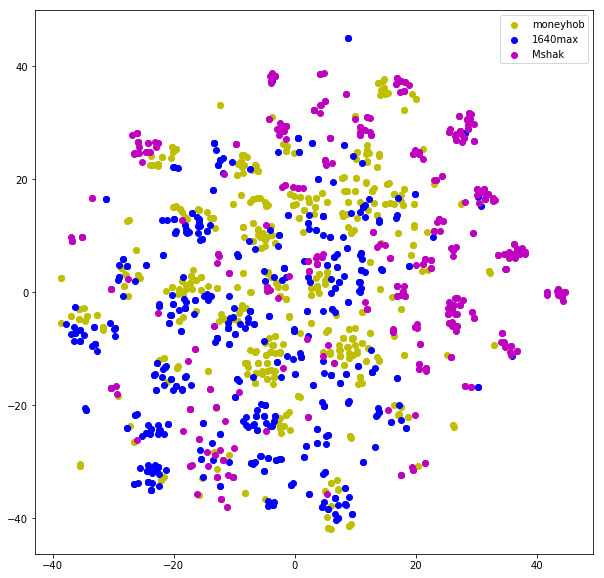

In [70]:
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.scatter(y1[lens[i]:lens[i+1], 0], y1[lens[i]:lens[i+1], 1], c=colors[i])
plt.legend(names)
plt.savefig("presentation/images/v2v.png")

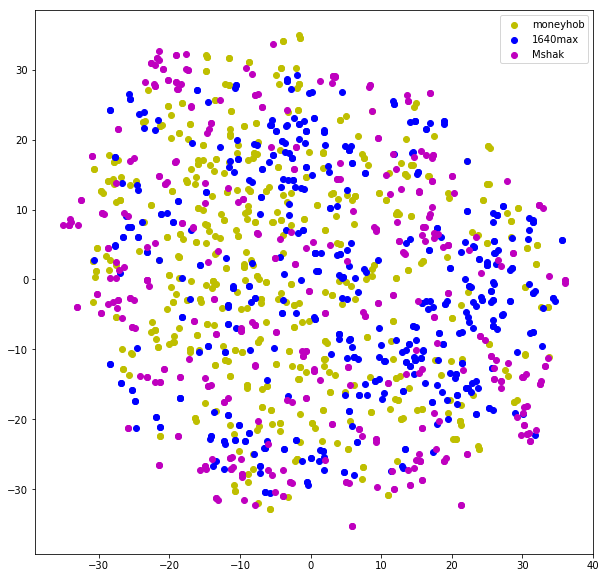

In [69]:
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.scatter(y2[lens[i]:lens[i+1], 0], y2[lens[i]:lens[i+1], 1], c=colors[i])
plt.legend(names)
plt.savefig("presentation/images/mel.png")

In [32]:
import librosa
import librosa.display

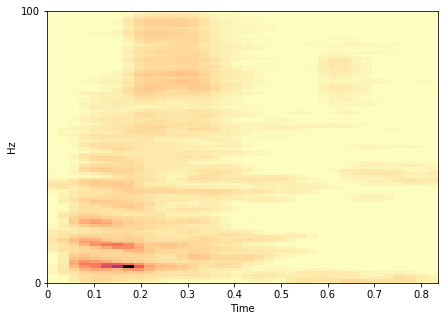

In [48]:
mel = users.base['yulia_m']['кусь']
plt.figure(figsize=(7, 5))
librosa.display.specshow(librosa.amplitude_to_db(mel),
                          y_axis='mel', fmax=100,
                          x_axis='time')
plt.savefig("presentation/images/kus.png")

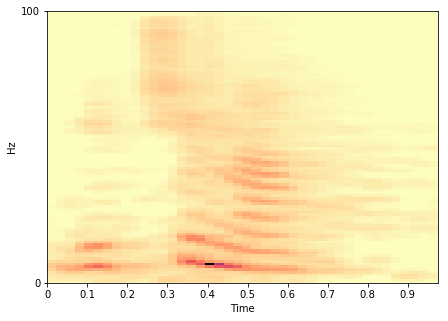

In [52]:
mel = users.base['yulia_m']['ветчина']
plt.figure(figsize=(7, 5))
librosa.display.specshow(librosa.amplitude_to_db(mel),
                          y_axis='mel', fmax=100,
                          x_axis='time')
plt.savefig("presentation/images/vetchina.png")

In [56]:
len(train_loader)

28